# Model Definition and Evaluation
## Table of Contents
1. [Model Selection](#model-selection)
2. [Feature Engineering](#feature-engineering)
3. [Hyperparameter Tuning](#hyperparameter-tuning)
4. [Implementation](#implementation)
5. [Evaluation Metrics](#evaluation-metrics)
6. [Comparative Analysis](#comparative-analysis)


In [1]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 3.4 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
# Import models you're considering


## Model Selection

ANN was selected as the most suitable model for the following task.


## Feature Engineering

Load a preprocessed data and select features.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/content/drive/MyDrive/opencampus_all_files/combined_data_r1.csv')

# Feature and target variable selection
Time_real = df['Time']
X = df[['Elevation', 'Slope_prev', 'Slope_next',  'Angle', 'Distance', 'Cumulative_Slope']] # Cumulative slope
y = df['Speed']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Hyperparameter Tuning

[Discuss any hyperparameter tuning methods you've applied, such as Grid Search or Random Search, and the rationale behind them.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Input Layer (6 features)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(256, activation='relu'))  # Large hidden layer to capture more complex patterns
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(BatchNormalization())  # Normalize activations for better performance
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))  # Dropout again after each hidden layer
model.add(BatchNormalization())

# Output Layer (1 output for regression)
model.add(Dense(1, activation='linear'))  # For regression, use linear activation function

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

# Summarize the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

## Implementation

[Implement the final model(s) you've selected based on the above steps.]


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/50
108486/108499 [============================>.] - ETA: 0s - loss: 6.3472 - mae: 1.8170
Epoch 1: val_loss improved from inf to 6.00192, saving model to best_model.h5
108499/108499 [==============================] - 313s 3ms/step - loss: 6.3472 - mae: 1.8170 - val_loss: 6.0019 - val_mae: 1.6620 - lr: 0.0010
Epoch 2/50
    58/108499 [..............................] - ETA: 4:56 - loss: 6.1900 - mae: 1.8026

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


108495/108499 [============================>.] - ETA: 0s - loss: 5.9210 - mae: 1.7403
Epoch 2: val_loss improved from 6.00192 to 5.70335, saving model to best_model.h5
108499/108499 [==============================] - 311s 3ms/step - loss: 5.9211 - mae: 1.7403 - val_loss: 5.7034 - val_mae: 1.6408 - lr: 0.0010
Epoch 3/50
108492/108499 [============================>.] - ETA: 0s - loss: 5.8023 - mae: 1.7174
Epoch 3: val_loss improved from 5.70335 to 5.54575, saving model to best_model.h5
108499/108499 [==============================] - 317s 3ms/step - loss: 5.8023 - mae: 1.7174 - val_loss: 5.5458 - val_mae: 1.6261 - lr: 0.0010
Epoch 4/50
108495/108499 [============================>.] - ETA: 0s - loss: 5.7391 - mae: 1.7054
Epoch 4: val_loss improved from 5.54575 to 5.45923, saving model to best_model.h5
108499/108499 [==============================] - 318s 3ms/step - loss: 5.7391 - mae: 1.7054 - val_loss: 5.4592 - val_mae: 1.6039 - lr: 0.0010
Epoch 5/50
108490/108499 [======================

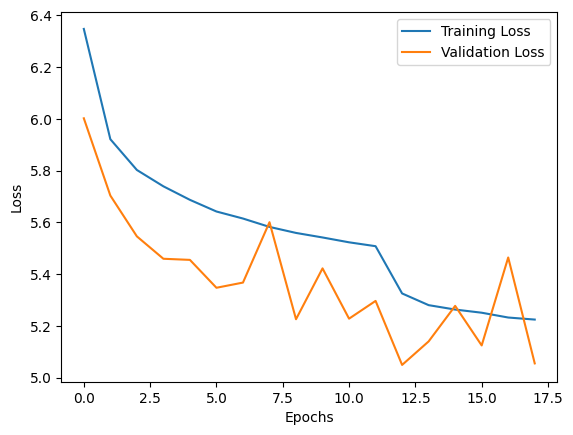

In [ ]:
# 1. Early Stopping: Stops training when validation loss doesn't improve.
early_stopping = EarlyStopping(
    monitor='val_loss',       # Metric to monitor
    patience=5,               # Number of epochs to wait for improvement
    restore_best_weights=True # Rollback to the best model weights
)

# 2. Model Checkpoint: Saves the best model during training.
model_checkpoint = ModelCheckpoint(
    'best_model.keras',           # Filepath to save the model
    monitor='val_loss',        # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='min',                # Minimize validation loss
    verbose=1                  # Show a message when saving the model
)

# 3. Learning Rate Scheduler: Reduce learning rate when validation loss plateaus.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Metric to monitor
    factor=0.1,                # Factor by which to reduce the learning rate
    patience=3,                # Number of epochs to wait before reducing
    min_lr=1e-6,               # Lower bound for learning rate
    verbose=1                  # Show a message when reducing the learning rate
)

# Combine callbacks into a list
callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Train the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=callbacks       # Pass callbacks to the fit method
)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Optionally, plot the training history (e.g., loss or MAE over epochs)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## Evaluation Metrics

[Clearly specify which metrics you'll use to evaluate the model performance, and why you've chosen these metrics.]


In [5]:
#Load model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/opencampus_all_files/models/best_model.h5')

In [6]:
# unzip test fikes
!unzip /content/drive/MyDrive/opencampus_all_files/Rider1_test_preprocessed.zip


Archive:  /content/drive/MyDrive/opencampus_all_files/Rider1_test_preprocessed.zip
   creating: content/Rider1_test_preprocessed/
  inflating: content/Rider1_test_preprocessed/r1_f746.csv  
  inflating: content/Rider1_test_preprocessed/r1_f241.csv  
  inflating: content/Rider1_test_preprocessed/r1_f234.csv  
  inflating: content/Rider1_test_preprocessed/r1_f493.csv  
  inflating: content/Rider1_test_preprocessed/r1_f479.csv  
  inflating: content/Rider1_test_preprocessed/r1_f9.csv  
  inflating: content/Rider1_test_preprocessed/r1_f349.csv  
  inflating: content/Rider1_test_preprocessed/r1_f665.csv  
  inflating: content/Rider1_test_preprocessed/r1_f42.csv  
  inflating: content/Rider1_test_preprocessed/r1_f578.csv  


In [ ]:
# Read test file
df = pd.read_csv('/content/content/Rider1_test_preprocessed/r1_f234.csv')

In [ ]:
# Feature selection
# Example: Selecting only two features for a simple baseline model
real_time = df['Time']
X = df[['Elevation', 'Slope_prev', 'Slope_next',  'Angle', 'Distance', 'Cumulative_Slope']] # Cumulative slope
y = df['Speed']


In [ ]:
# Normalize the new data using the same scaler fitted on the training data
X_new_scaled = scaler.transform(X)

# Make predictions on the new data
y_pred = model.predict(X_new_scaled)

# Add the predicted values as a new column 'Speed_pred' in the original DataFrame
df['Speed_pred'] = y_pred

# Optionally, check the first few rows to verify the new column is added correctly
print(df.head())


196/196 [==============================] - 0s 2ms/step
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      468.4   -0.212480   -0.095519  178.010424   0.470633         -0.212480   
1      468.3   -0.095519   -0.105583  162.415455   1.517546         -0.307999   
2      468.2   -0.105583   -0.029522   27.899756   2.464669         -0.413582   
3      468.1   -0.029522   -0.076752  159.951057   5.851968         -0.443104   
4      467.7   -0.076752    0.111864  114.903001  11.063557         -0.519856   

      Speed  Time  Speed_pred  
0  0.758773     1    2.603833  
1  0.664679     2    8.755311  
2  0.722404     4    1.481009  
3  1.228413     8    7.311934  
4  1.762544    11    2.025287  


In [ ]:
# prompt: Calculate MAE between df['Speed_pred'] and df['Speed']
import numpy as np
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['Speed'], df['Speed_pred'])
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 2.558610318946796


In [ ]:
# Initialize Time column
df['pred_time'] = 0.0

# Compute predicted time
for i in range(2, len(df)):
  if pd.notna(df.loc[i, 'Speed_pred']):
    if df.loc[i, 'Speed_pred'] != 0:
      df.loc[i, 'pred_time'] = df.loc[i - 1, 'pred_time'] + (df.loc[i, 'Distance'] - df.loc[i - 1, 'Distance']) / df.loc[i, 'Speed_pred']
    else:
      df.loc[i, 'pred_time'] = df.loc[i - 1, 'pred_time']

print(df)

      Elevation  Slope_prev  Slope_next       Angle      Distance  \
0         468.4   -0.212480   -0.095519  178.010424      0.470633   
1         468.3   -0.095519   -0.105583  162.415455      1.517546   
2         468.2   -0.105583   -0.029522   27.899756      2.464669   
3         468.1   -0.029522   -0.076752  159.951057      5.851968   
4         467.7   -0.076752    0.111864  114.903001     11.063557   
...         ...         ...         ...         ...           ...   
6255      476.7   -0.171718   -0.082984  179.143224  51250.040526   
6256      475.2   -0.082984   -0.021847  179.209099  51268.116334   
6257      474.8   -0.021847   -0.064105  178.353241  51286.425116   
6258      473.6   -0.064105   -0.084127  178.576724  51305.144334   
6259      472.0   -0.084127   -0.021320  179.481785  51324.163149   

      Cumulative_Slope     Speed   Time  Speed_pred    pred_time  
0            -0.212480  0.758773      1    2.603833     0.000000  
1            -0.307999  0.664679     

In [ ]:
df[['Speed', 'Speed_pred', 'Time', 'pred_time']]

,Speed,Speed_pred,Time,pred_time
0,0.758773,2.603833,1,0.000000
1,0.664679,8.755311,2,0.000000
2,0.722404,1.481009,4,0.639513
3,1.228413,7.311934,8,1.102769
4,1.762544,2.025287,11,3.676028
...,...,...,...,...
6255,9.032163,10.253121,19523,-6381.419732
6256,9.096147,12.089524,19525,-6379.924569
6257,9.257000,10.712694,19527,-6378.215496
6258,9.434508,11.147212,19529,-6376.536222


In [39]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

# Define the folder containing the files
input_folder_path = '/content/content/Rider1_test_preprocessed/'
output_folder_path = '/content/content/Rider1_test_NN/'

!mkdir -p /content/content/Rider1_test_NN

# List all CSV files in the folder
csv_files = [f for f in os.listdir(input_folder_path) if f.endswith('.csv')]

# Iterate through each file in the folder
for file in csv_files:
    file_path = os.path.join(input_folder_path, file)

    # Read test file
    df = pd.read_csv(file_path)

    # Check if 'Time' column exists before accessing it
    if 'Time' in df.columns:
        real_time = df['Time']
    else:
        # Handle the case where 'Time' column is missing
        # For example, you can assign a default value or skip the file
        print(f"File {file} is missing 'Time' column. Skipping...")
        continue  # Skip to the next file

    # Feature selection
    real_time = df['Time']
    X = df[['Elevation', 'Slope_prev', 'Slope_next', 'Angle', 'Distance', 'Cumulative_Slope']]
    y = df['Speed']

    # Normalize the new data using the same scaler fitted on the training data
    X_new_scaled = scaler.transform(X)

    # Make predictions on the new data
    y_pred = model.predict(X_new_scaled)

    # Add the predicted values as a new column 'Speed_pred' in the original DataFrame
    df['Speed_pred'] = y_pred

    # Calculate MAE between df['Speed_pred'] and df['Speed']
    mae = mean_absolute_error(df['Speed'], df['Speed_pred'])
    print(f"File: {file} | Mean Absolute Error: {mae}")

    # Initialize Time column
    df['Time_pred'] = float(df['Time'].iloc[0])

    # Compute predicted time
    for i in range(2, len(df)):
        if df.loc[i, 'Speed_pred'] < 0:
            df.loc[i, 'Speed_pred'] = 0
        if pd.notna(df.loc[i, 'Speed_pred']):
            if df.loc[i, 'Speed_pred'] != 0:
                df.loc[i, 'Time_pred'] = (
                    df.loc[i - 1, 'Time_pred'] +
                    (df.loc[i, 'Distance'] - df.loc[i - 1, 'Distance']) / df.loc[i, 'Speed_pred']
                )
            else:
                df.loc[i, 'Time_pred'] = df.loc[i - 1, 'Time_pred']

    # Save the processed DataFrame to a new file (optional)
    output_file_path = os.path.join(output_folder_path, f"processed_{file}")
    df.to_csv(output_file_path, index=False)

    # Optionally, print the first few rows of the updated DataFrame
    print(f"Processed file: {file}")
    print(df.head())


395/395 [==============================] - 0s 1ms/step
File: r1_f746.csv | Mean Absolute Error: 1.3030323780062314
Processed file: r1_f746.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      258.8         0.0         0.0  178.182668   3.824572               0.0   
1      258.8         0.0         0.0  177.009219   8.419597               0.0   
2      258.8         0.0         0.0  177.707558  13.784474               0.0   
3      258.8         0.0         0.0  177.833176  19.459475               0.0   
4      258.8         0.0         0.0  173.758391  25.294951               0.0   

      Speed  Time  Speed_pred  Time_pred  
0  4.209799     1    5.676500   1.000000  
1  4.979951     2    5.794631   1.000000  
2  5.519939     3    5.750638   1.932919  
3  5.755239     4    5.774496   2.915689  
4  5.959725     5    5.480112   3.980535  
12/12 [==============================] - 0s 1ms/step
File: r1_f241.csv | Mean Absolute Error: 1.4637179816093215

In [40]:
# Summary statistics for processed files
summary_nn = []
processed_files = [f for f in os.listdir(output_folder_path) if f.startswith('processed') and f.endswith('.csv')]

for file in processed_files:
    file_path = os.path.join(output_folder_path, file)
    df = pd.read_csv(file_path)

    # Extract the last value of 'Time' and 'Time_pred'
    last_time = df['Time'].iloc[-1]
    last_time_pred = df['Time_pred'].iloc[-1]

    # Calculate percentage difference
    percentage_diff = ((last_time_pred - last_time) / last_time) * 100 if last_time != 0 else None

    # Append to summary
    summary_nn.append({
        'file': file,
        'last_time': last_time,
        'last_time_pred': last_time_pred,
        'percentage_diff': percentage_diff
    })

# Print summary
summary_nn_df = pd.DataFrame(summary_nn)
print(summary_nn_df)


                    file  last_time  last_time_pred  percentage_diff
0  processed_r1_f234.csv      19531    12860.061076       -34.155644
1  processed_r1_f241.csv       1085     1180.568972         8.808200
2  processed_r1_f493.csv       4569     5125.459563        12.179023
3   processed_r1_f42.csv       3283     2502.142104       -23.784889
4  processed_r1_f665.csv       2186     2106.633239        -3.630684
5  processed_r1_f479.csv       5627    18773.380544       233.630363
6  processed_r1_f578.csv       7444     8005.892714         7.548263
7  processed_r1_f746.csv      13099    13319.743589         1.685194
8  processed_r1_f349.csv       6557     2906.933543       -55.666714
9    processed_r1_f9.csv       4364     3105.762807       -28.832200


## Comparative Analysis

[Compare the performance of your model(s) against the baseline model. Discuss any improvements or setbacks and the reasons behind them.]


In [41]:
import joblib

# To load the model later:
lr_model = joblib.load('/content/drive/MyDrive/opencampus_all_files/models/lr_model.joblib')

In [42]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

# Define the folder containing the files
input_folder_path = '/content/content/Rider1_test_preprocessed/'
output_folder_path = '/content/content/Rider1_test_LR/'

!mkdir -p /content/content/Rider1_test_LR

# List all CSV files in the folder
csv_files = [f for f in os.listdir(input_folder_path) if f.endswith('.csv')]

# Iterate through each file in the folder
for file in csv_files:
    file_path = os.path.join(input_folder_path, file)

    # Read test file
    df = pd.read_csv(file_path)

    # Check if 'Time' column exists before accessing it
    if 'Time' in df.columns:
        real_time = df['Time']
    else:
        # Handle the case where 'Time' column is missing
        # For example, you can assign a default value or skip the file
        print(f"File {file} is missing 'Time' column. Skipping...")
        continue  # Skip to the next file

    # Feature selection
    real_time = df['Time']
    X = df[['Elevation', 'Slope_prev', 'Slope_next', 'Angle', 'Distance', 'Cumulative_Slope']]
    y = df['Speed']

    # Normalize the new data using the same scaler fitted on the training data
    X_new_scaled = scaler.transform(X)

    # Make predictions on the new data
    y_pred = lr_model.predict(X_new_scaled)

    # Add the predicted values as a new column 'Speed_pred' in the original DataFrame
    df['Speed_pred'] = y_pred

    # Calculate MAE between df['Speed_pred'] and df['Speed']
    mae = mean_absolute_error(df['Speed'], df['Speed_pred'])
    print(f"File: {file} | Mean Absolute Error: {mae}")

    # Initialize Time column
    df['Time_pred'] = float(df['Time'].iloc[0])

    # Compute predicted time
    for i in range(2, len(df)):
        if df.loc[i, 'Speed_pred'] < 0:
            df.loc[i, 'Speed_pred'] = 0
        if pd.notna(df.loc[i, 'Speed_pred']):
            if df.loc[i, 'Speed_pred'] != 0:
                df.loc[i, 'Time_pred'] = (
                    df.loc[i - 1, 'Time_pred'] +
                    (df.loc[i, 'Distance'] - df.loc[i - 1, 'Distance']) / df.loc[i, 'Speed_pred']
                )
            else:
                df.loc[i, 'Time_pred'] = df.loc[i - 1, 'Time_pred']

    # Save the processed DataFrame to a new file (optional)
    output_file_path = os.path.join(output_folder_path, f"processed_{file}")
    df.to_csv(output_file_path, index=False)

    # Optionally, print the first few rows of the updated DataFrame
    print(f"Processed file: {file}")
    print(df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


File: r1_f746.csv | Mean Absolute Error: 10.651889601685786
Processed file: r1_f746.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      258.8         0.0         0.0  178.182668   3.824572               0.0   
1      258.8         0.0         0.0  177.009219   8.419597               0.0   
2      258.8         0.0         0.0  177.707558  13.784474               0.0   
3      258.8         0.0         0.0  177.833176  19.459475               0.0   
4      258.8         0.0         0.0  173.758391  25.294951               0.0   

      Speed  Time  Speed_pred  Time_pred  
0  4.209799     1   -0.928300        1.0  
1  4.979951     2   -0.934075        1.0  
2  5.519939     3    0.000000        1.0  
3  5.755239     4    0.000000        1.0  
4  5.959725     5    0.000000        1.0  
File: r1_f241.csv | Mean Absolute Error: 10.435283046626644
Processed file: r1_f241.csv
   Elevation  Slope_prev  Slope_next       Angle    Distance  \
0      266.4   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


File: r1_f234.csv | Mean Absolute Error: 11.246181286414112
Processed file: r1_f234.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      468.4   -0.212480   -0.095519  178.010424   0.470633         -0.212480   
1      468.3   -0.095519   -0.105583  162.415455   1.517546         -0.307999   
2      468.2   -0.105583   -0.029522   27.899756   2.464669         -0.413582   
3      468.1   -0.029522   -0.076752  159.951057   5.851968         -0.443104   
4      467.7   -0.076752    0.111864  114.903001  11.063557         -0.519856   

      Speed  Time  Speed_pred  Time_pred  
0  0.758773     1   12.276047   1.000000  
1  0.664679     2    7.635556   1.000000  
2  0.722404     4    4.118599   1.229963  
3  1.228413     8    3.557850   2.182026  
4  1.762544    11    0.000000   2.182026  
File: r1_f493.csv | Mean Absolute Error: 12.925075154083931


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f493.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0       10.0         0.0         0.0  173.325900   2.445073               0.0   
1       10.0         0.0         0.0  173.798238   7.145000               0.0   
2       10.0         0.0         0.0  178.875597  12.048084               0.0   
3       10.0         0.0         0.0  178.810910  18.178957               0.0   
4       10.0         0.0         0.0  179.331041  24.451975               0.0   

      Speed  Time  Speed_pred  Time_pred  
0  3.572500     1   -0.951482        1.0  
1  4.801505     2   -0.949157        1.0  
2  5.516978     3    0.000000        1.0  
3  6.201946     4    0.000000        1.0  
4  6.453282     5    0.000000        1.0  
File summary_statistics.csv is missing 'Time' column. Skipping...
File: r1_f479.csv | Mean Absolute Error: 10.17679818599307


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f479.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      254.0    0.000000    0.000000  178.508604   5.600179          0.000000   
1      254.0    0.000000    0.000000  176.278064  54.794590          0.000000   
2      254.0    0.000000    0.000000  179.495847  67.707147          0.000000   
3      254.0    0.000000   -0.132167  179.074368  74.199808          0.000000   
4      253.2   -0.132167    0.000000  177.748644  80.252742         -0.132167   

      Speed  Time  Speed_pred  Time_pred  
0  6.088288     1   -0.926682   1.000000  
1  6.210697     9   -0.937660   1.000000  
2  6.468406    11    0.000000   1.000000  
3  6.272797    12    4.784264   2.357087  
4  6.528377    13    4.717825   3.640079  
File: r1_f9.csv | Mean Absolute Error: 32.04153516192238


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f9.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      247.0    0.000000    0.000000  172.042187   3.624037          0.000000   
1      247.0    0.000000    0.000000  174.888462   7.192898          0.000000   
2      247.0    0.000000   -0.013070  179.518522  10.875470          0.000000   
3      246.8   -0.013070    0.032535  177.109121  26.177383         -0.013070   
4      247.4    0.032535    0.071546  172.412323  44.619123          0.019465   

      Speed  Time  Speed_pred  Time_pred  
0  3.596449     1   -0.958488        1.0  
1  3.625716     2   -0.944479        1.0  
2  3.796897     3    0.000000        1.0  
3  3.749295     7    0.000000        1.0  
4  3.702924    12    0.000000        1.0  
File: r1_f349.csv | Mean Absolute Error: 10.728371691505563


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f349.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      494.8    0.000000    0.000000  161.826378   0.402993          0.000000   
1      494.8    0.000000    0.000000  177.886289   3.426452          0.000000   
2      494.8    0.000000   -0.014277  174.518794   6.525339          0.000000   
3      494.6   -0.014277   -0.010197  179.935308  20.533976         -0.014277   
4      494.4   -0.010197   -0.014883  174.059726  40.148203         -0.024474   

       Speed  Time  Speed_pred   Time_pred  
0   1.713226    16   -1.009488   16.000000  
1   3.061173    17   -0.930444   16.000000  
2   8.553762    18    0.000000   16.000000  
3  16.811432    19    0.130157  123.629015  
4  16.525977    20    0.129286  275.341445  
File: r1_f665.csv | Mean Absolute Error: 8.488772823825192


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f665.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      227.6    0.000000    0.000000  174.095507   3.091916          0.000000   
1      227.6    0.000000    0.000000  177.071966  17.663976          0.000000   
2      227.6    0.000000    0.000000  179.390719  21.154679          0.000000   
3      227.6    0.000000    0.067987  176.946075  23.247803          0.000000   
4      227.8    0.067987    0.066305  167.186352  26.189524          0.067987   

      Speed  Time  Speed_pred  Time_pred  
0  2.943996     1   -0.948326        1.0  
1  3.010461     6   -0.933676        1.0  
2  2.791914     7    0.000000        1.0  
3  2.517423     8    0.000000        1.0  
4  2.979046     9    0.000000        1.0  
File: r1_f42.csv | Mean Absolute Error: 11.713776334864164


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f42.csv
   Elevation  Slope_prev  Slope_next       Angle   Distance  Cumulative_Slope  \
0      247.8         0.0         0.0  173.508517  42.176962               0.0   
1      247.8         0.0         0.0  174.667145  50.056760               0.0   
2      247.8         0.0         0.0  173.135308  79.986347               0.0   
3      247.8         0.0         0.0  174.567053  87.485987               0.0   
4      247.8         0.0         0.0  166.309773  95.821330               0.0   

      Speed  Time  Speed_pred  Time_pred  
0  8.342793     5   -0.951273        5.0  
1  7.561877     6   -0.945571        5.0  
2  7.485845    10    0.000000        5.0  
3  7.917491    11    0.000000        5.0  
4  9.429898    12    0.000000        5.0  
File: r1_f578.csv | Mean Absolute Error: 11.520779066242234


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Processed file: r1_f578.csv
   Elevation  Slope_prev  Slope_next       Angle    Distance  \
0      264.0    0.000000    0.000000  178.932488    7.192045   
1      264.0    0.000000    0.000000  175.330947   14.813700   
2      264.0    0.000000    0.000000  179.733786   54.034055   
3      264.0    0.000000    0.006133  179.724026   70.427704   
4      264.2    0.006133    0.000000  175.511137  103.040336   

   Cumulative_Slope     Speed  Time  Speed_pred  Time_pred  
0          0.000000  7.406850     1   -0.924625        1.0  
1          0.000000  7.807002     2   -0.942351        1.0  
2          0.000000  7.944858     7    0.000000        1.0  
3          0.000000  8.167714     9    0.000000        1.0  
4          0.006133  8.300082    13    0.000000        1.0  


In [45]:
# Summary statistics for processed files
summary_lr = []
processed_files = [f for f in os.listdir(output_folder_path) if f.startswith('processed') and f.endswith('.csv')]

for file in processed_files:
    file_path = os.path.join(output_folder_path, file)
    df = pd.read_csv(file_path)

    # Extract the last value of 'Time' and 'Time_pred'
    last_time = df['Time'].iloc[-1]
    last_time_pred = df['Time_pred'].iloc[-1]

    # Calculate percentage difference
    percentage_diff = ((last_time_pred - last_time) / last_time) * 100 if last_time != 0 else None

    # Append to summary
    summary_lr.append({
        'file': file,
        'last_time': last_time,
        'last_time_pred': last_time_pred,
        'percentage_diff': percentage_diff
    })

# Print summary
summary_nn_df = pd.DataFrame(summary_nn)
print(summary_nn_df)

summary_lr_df = pd.DataFrame(summary_lr)
print(summary_lr_df)

print(summary_nn_df['percentage_diff'].mean())
print(summary_lr_df['percentage_diff'].mean())

                    file  last_time  last_time_pred  percentage_diff
0  processed_r1_f234.csv      19531    12860.061076       -34.155644
1  processed_r1_f241.csv       1085     1180.568972         8.808200
2  processed_r1_f493.csv       4569     5125.459563        12.179023
3   processed_r1_f42.csv       3283     2502.142104       -23.784889
4  processed_r1_f665.csv       2186     2106.633239        -3.630684
5  processed_r1_f479.csv       5627    18773.380544       233.630363
6  processed_r1_f578.csv       7444     8005.892714         7.548263
7  processed_r1_f746.csv      13099    13319.743589         1.685194
8  processed_r1_f349.csv       6557     2906.933543       -55.666714
9    processed_r1_f9.csv       4364     3105.762807       -28.832200
                    file  last_time  last_time_pred  percentage_diff
0  processed_r1_f234.csv      19531    21505.349926        10.108801
1  processed_r1_f241.csv       1085      492.334048       -54.623590
2  processed_r1_f493.csv       456